# RESUME

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
final_df = pd.read_csv('/content/drive/MyDrive/data/training.csv')
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
9212,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9213,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9214,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9215,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0
9216,Korea Republic,Egypt,29,32,1,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0


# GROUP STAGE MODELING

### Choosing a model

In [4]:
pipe_DF = final_df
final_df = pd.get_dummies(final_df)

In [5]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [7]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

* **Random Forest**

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       121
           1       0.65      0.79      0.71       225
           2       0.34      0.15      0.21       115

    accuracy                           0.58       461
   macro avg       0.50      0.51      0.49       461
weighted avg       0.54      0.58      0.55       461



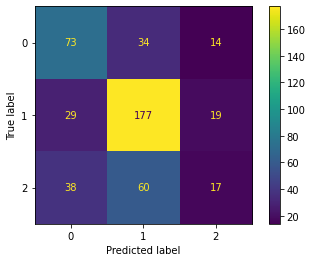

In [8]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

Gradient Boosting


              precision    recall  f1-score   support

           0       0.53      0.64      0.58       121
           1       0.65      0.87      0.74       225
           2       0.23      0.03      0.05       115

    accuracy                           0.60       461
   macro avg       0.47      0.51      0.46       461
weighted avg       0.51      0.60      0.53       461



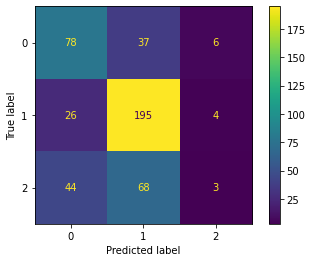

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
metrics_display(GradientBoostingClassifier())

Neural Network


              precision    recall  f1-score   support

           0       0.43      0.47      0.45       121
           1       0.65      0.71      0.68       225
           2       0.30      0.22      0.25       115

    accuracy                           0.52       461
   macro avg       0.46      0.47      0.46       461
weighted avg       0.51      0.52      0.51       461



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


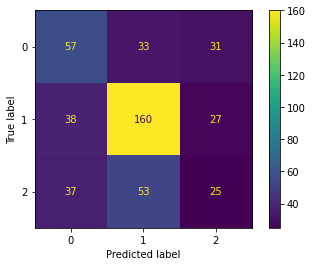

In [10]:
from sklearn.neural_network import MLPClassifier
metrics_display(MLPClassifier())

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.51      0.63      0.57       121
           1       0.63      0.85      0.73       225
           2       0.33      0.03      0.05       115

    accuracy                           0.59       461
   macro avg       0.49      0.50      0.45       461
weighted avg       0.53      0.59      0.51       461



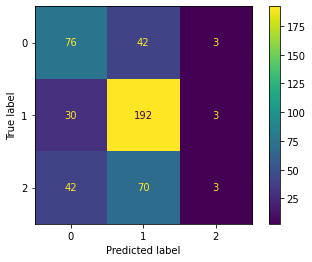

In [11]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.52      0.65      0.58       121
           1       0.65      0.88      0.74       225
           2       0.50      0.03      0.05       115

    accuracy                           0.61       461
   macro avg       0.56      0.52      0.46       461
weighted avg       0.58      0.61      0.53       461



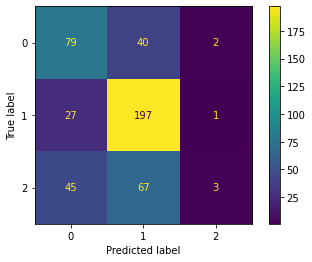

In [12]:
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

### XGB Boost - Tuning & Hold-out Validation

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

search_space = {
    "n_estimators" : [200,250,300,350,400,450,500],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1]
}

In [14]:
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

* **Default Hyperparameters**

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       250
           1       0.80      0.85      0.82       465

    accuracy                           0.76       715
   macro avg       0.74      0.72      0.73       715
weighted avg       0.76      0.76      0.76       715



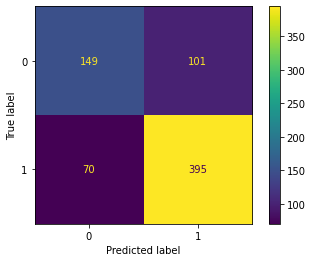

In [36]:
model = XGBClassifier(use_label_encoder = False, gamma = 4, learning_rate = 0.001, n_estimators = 400, max_depth = 17)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

### Creating a pipeline for the XGB model

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False, gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(gamma=0.01, learning_rate=0.01, max_depth=4,
                               n_estimators=300, objective='multi:softprob',
                               use_label_encoder=False))])

In [18]:
import joblib
joblib.dump(pipe_League,"/content/drive/MyDrive/models/groups_stage_prediction.pkl")

['/content/drive/MyDrive/models/groups_stage_prediction.pkl']

# KNOCKOUT STAGE MODELING

### Choosing the model 

Removing Draw status.

In [19]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [20]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       270
           1       0.77      0.83      0.80       446

    accuracy                           0.73       716
   macro avg       0.72      0.70      0.71       716
weighted avg       0.73      0.73      0.73       716



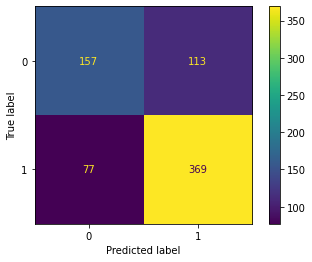

In [21]:
metrics_display(AdaBoostClassifier())

*   **Random Forest**




              precision    recall  f1-score   support

           0       0.65      0.64      0.64       270
           1       0.78      0.79      0.79       446

    accuracy                           0.73       716
   macro avg       0.72      0.72      0.72       716
weighted avg       0.73      0.73      0.73       716



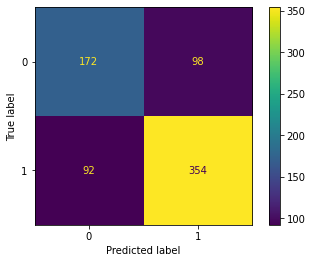

In [22]:
metrics_display(RandomForestClassifier())

Gradient Boosting


              precision    recall  f1-score   support

           0       0.70      0.63      0.66       270
           1       0.79      0.84      0.81       446

    accuracy                           0.76       716
   macro avg       0.75      0.73      0.74       716
weighted avg       0.76      0.76      0.76       716



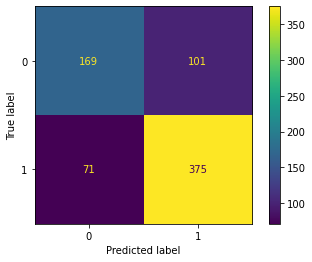

In [23]:
metrics_display(GradientBoostingClassifier())

Neural Network


              precision    recall  f1-score   support

           0       0.76      0.44      0.56       270
           1       0.73      0.92      0.81       446

    accuracy                           0.74       716
   macro avg       0.75      0.68      0.69       716
weighted avg       0.74      0.74      0.72       716



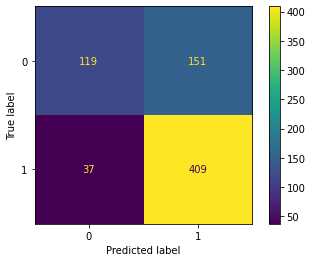

In [24]:
metrics_display(MLPClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       270
           1       0.78      0.85      0.81       446

    accuracy                           0.76       716
   macro avg       0.74      0.73      0.73       716
weighted avg       0.75      0.76      0.75       716



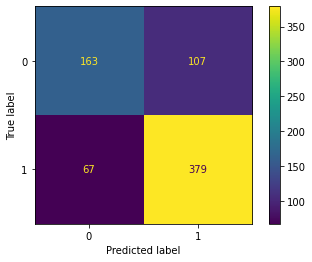

In [25]:
metrics_display(XGBClassifier(use_label_encoder=False))

### Random Forest - Tuning & Hold-out Validation 

In [26]:
search_space = {
    "max_depth" : [11,12,13,14,15,16],
    "max_leaf_nodes" : [170,180,190,200,210,220,230],
    "min_samples_leaf" : [3,4,5,6,7,8],
    "n_estimators" : [310,320,330,340,350]
}

In [27]:
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       250
           1       0.81      0.82      0.81       465

    accuracy                           0.75       715
   macro avg       0.73      0.72      0.73       715
weighted avg       0.75      0.75      0.75       715



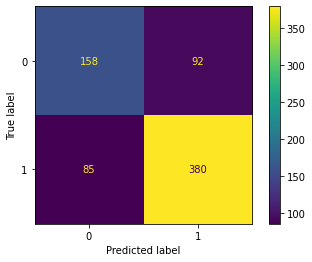

In [28]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       250
           1       0.80      0.87      0.83       465

    accuracy                           0.77       715
   macro avg       0.75      0.73      0.73       715
weighted avg       0.76      0.77      0.76       715



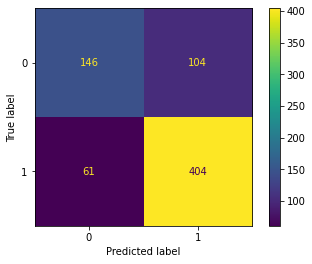

In [29]:
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The Random Forest greatly improves performance with the tuned hyperparameters; let's see the XGB Boost model.

### XGB Boost - Tuning & Hold-out Validation

In [30]:
search_space = {
    "n_estimators" : [300,350,400,450,500,550,600],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01]
}

In [31]:
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       250
           1       0.80      0.88      0.83       465

    accuracy                           0.77       715
   macro avg       0.76      0.73      0.74       715
weighted avg       0.77      0.77      0.77       715



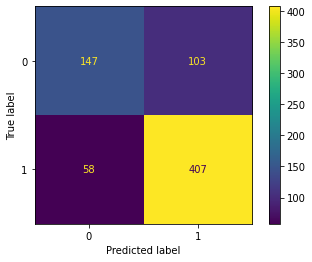

In [32]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.74      0.57      0.64       250
           1       0.79      0.89      0.84       465

    accuracy                           0.78       715
   macro avg       0.76      0.73      0.74       715
weighted avg       0.77      0.78      0.77       715



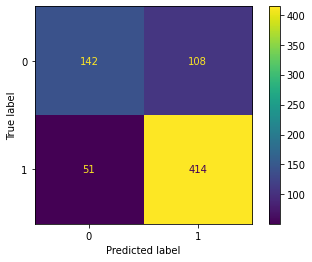

In [33]:
model = XGBClassifier(gamma=4,learning_rate=0.0001, max_depth=5,n_estimators=300)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

### Creating a pipeline for the XGB Boost model

In [34]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500))
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(gamma=0.01, learning_rate=0.01, max_depth=5,
                               n_estimators=500))])

In [35]:
joblib.dump(pipe_knock,"/content/drive/MyDrive/models/knockout_stage_prediction.pkl")

['/content/drive/MyDrive/models/knockout_stage_prediction.pkl']